<a href="https://colab.research.google.com/github/aadi-kanwar/Neural-Network-Deep-Learning/blob/main/Exp_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Here's a Python script to create a synthetic dataset for a classification problem. This dataset can simulate a two-class problem with features generated using a mixture of Gaussian distributions. You can save it as a CSV file for later use.

Dataset saved as synthetic_classification_dataset.csv


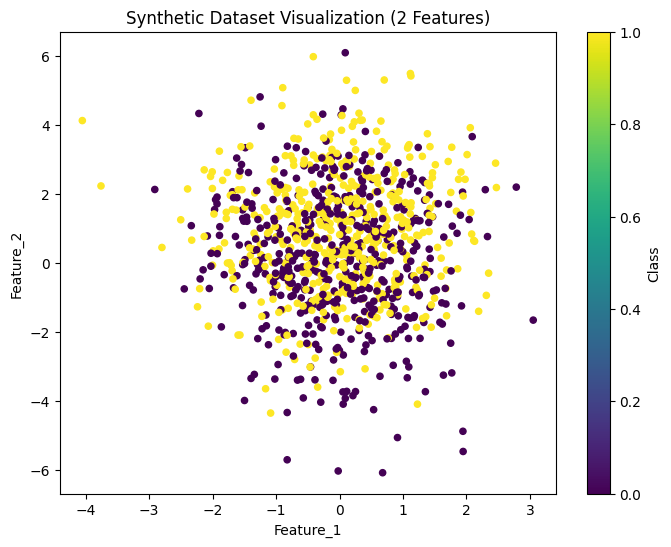

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Parameters for the synthetic dataset
n_samples = 1000  # Number of samples
n_features = 10   # Number of features
n_informative = 8 # Number of informative features
n_classes = 2     # Number of classes

# Generate the dataset
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=0,
    n_classes=n_classes,
    random_state=42
)

# Convert to DataFrame
columns = [f"Feature_{i+1}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['Target'] = y

# Save the dataset to a CSV file
dataset_name = "synthetic_classification_dataset.csv"
df.to_csv(dataset_name, index=False)
print(f"Dataset saved as {dataset_name}")

# Visualize the dataset (only using two features for visualization)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=20)
plt.title("Synthetic Dataset Visualization (2 Features)")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.colorbar(label="Class")
plt.show()


In [ ]:
import os
import numpy as np
from PIL import Image, ImageDraw
import random

# Create output directories
def create_directories(base_dir, class_names):
    for class_name in class_names:
        os.makedirs(os.path.join(base_dir, class_name), exist_ok=True)

# Generate a random image with a specific shape
def generate_image(shape, img_size=(128, 128)):
    img = Image.new("RGB", img_size, (255, 255, 255))
    draw = ImageDraw.Draw(img)
    color = tuple(np.random.randint(0, 256, size=3))  # Random RGB color

    if shape == "circle":
        x0, y0 = random.randint(10, 50), random.randint(10, 50)
        x1, y1 = random.randint(60, 120), random.randint(60, 120)
        draw.ellipse([x0, y0, x1, y1], fill=color, outline=None)
    elif shape == "square":
        x0, y0 = random.randint(10, 50), random.randint(10, 50)
        x1, y1 = x0 + random.randint(30, 70), y0 + random.randint(30, 70)
        draw.rectangle([x0, y0, x1, y1], fill=color, outline=None)
    elif shape == "triangle":
        x0, y0 = random.randint(10, 50), random.randint(60, 120)
        x1, y1 = random.randint(60, 120), random.randint(60, 120)
        x2, y2 = random.randint(30, 100), random.randint(10, 50)
        draw.polygon([x0, y0, x1, y1, x2, y2], fill=color, outline=None)

    return img

# Generate dataset
def generate_dataset(output_dir, num_samples_per_class=100):
    class_names = ["circle", "square", "triangle"]
    create_directories(output_dir, class_names)

    for class_name in class_names:
        for i in range(num_samples_per_class):
            img = generate_image(class_name)
            img.save(os.path.join(output_dir, class_name, f"{class_name}_{i}.png"))

# Main function
if __name__ == "__main__":
    output_dir = "synthetic_dataset"
    num_samples_per_class = 200  # Number of images per class
    generate_dataset(output_dir, num_samples_per_class)
    print(f"Synthetic dataset created in '{output_dir}' directory.")


Synthetic dataset created in 'synthetic_dataset' directory.


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3294 - loss: 1.2033 - val_accuracy: 0.4750 - val_loss: 1.0241
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4434 - loss: 1.0386 - val_accuracy: 0.6187 - val_loss: 0.9223
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6140 - loss: 0.8708 - val_accuracy: 0.7000 - val_loss: 0.8331
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6788 - loss: 0.8087 - val_accuracy: 0.7688 - val_loss: 0.7612
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7091 - loss: 0.7558 - val_accuracy: 0.7937 - val_loss: 0.7049
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6967 - loss: 0.7039 - val_accuracy: 0.8000 - val_loss: 0.6617
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7267 - loss: 0.6843 - val_accuracy: 0.8000 - val_loss: 0.6366
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7686 - loss: 0.6192 - val_accuracy: 0.8125 - val_loss: 0.6087
Ep

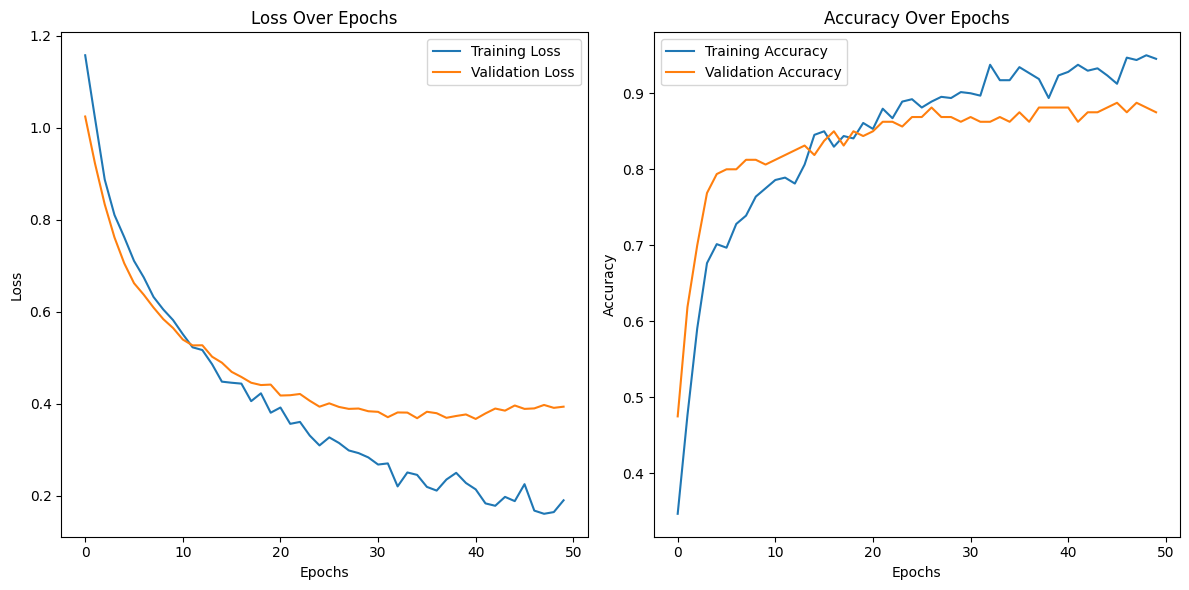

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


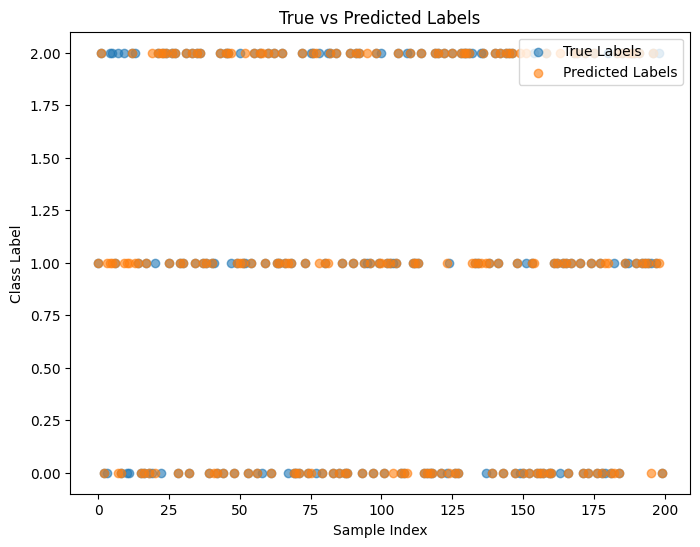

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Generate or load the dataset
# Here, we generate a synthetic dataset for demonstration purposes
from sklearn.datasets import make_classification

n_samples = 1000
n_features = 20
n_classes = 3

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=15,
    n_classes=n_classes,
    random_state=42
)

# Convert the target to categorical format for multiclass classification
y_categorical = to_categorical(y, num_classes=n_classes)

# Step 2: Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Step 3: Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Build the advanced deep learning model
model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(n_classes, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Visualize training results
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Predict and visualize predictions
predictions = np.argmax(model.predict(X_test), axis=1)
true_labels = np.argmax(y_test, axis=1)

# Scatter plot for true vs predicted labels (2D visualization)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(true_labels)), true_labels, label="True Labels", alpha=0.6)
plt.scatter(range(len(predictions)), predictions, label="Predicted Labels", alpha=0.6)
plt.title("True vs Predicted Labels")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()
